# Association Analysis and Deep Learning

- For the association analysis task, use [Mlxtend](http://rasbt.github.io/mlxtend/)
- For the deep learning task, use [Tensorflow](https://www.tensorflow.org/) via [Keras](https://keras.io/) or [PyTorch](https://pytorch.org/)

### Support
- Support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database.
- An itemset is considered a `frequent itemset` if its support is larger than a specified `minsup` threshold.
- All subsets of a frequent itemset are also frequent.
$$\text{support}(A \rightarrow C) = \text{support}(A \cup C), \text{ range: } [0, 1]$$

### Confidence
- Confidence measures the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that confidence is not symmetric.
$$\text{confidence}(A \rightarrow C) = \frac{\text{support}(A \rightarrow C)}{\text{support}(A)}, \text{ range: } [0, 1]$$

### Lift
- Lift is commonly used to measure how much more often the antecedent and consequent of a rule $A \rightarrow C$ occur together than we would expect if they were statistically independent.
- If $A$ and $C$ are independent, the lift score will be exactly 1.
$$\text{lift}(A \rightarrow C) = \frac{\text{confidence}(A \rightarrow C)}{\text{support}(C)}, \text{ range: } [0, \infty]$$

[Source](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## 1. Association Rule Generation from Transaction Data

Utilize the transaction dataset located at `data/Grocery_Items_3.csv`.

With `minimum support = 0.01` and `minimum confidence threshold = 0.1`, identify the association rules that can be derived from the dataset. A reference for generating association rules can be found in this [GitHub Source Code](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/).

Employ the following parameters:
- Minimum Support Values (MSV): `0.001, 0.005, 0.01, 0.05`
- Minimum Confidence Threshold (MCT): `0.05, 0.075, 0.1`

For each combination of MSV and MCT, determine the count of association rules extracted from the dataset. Visualize the count results using a heatmap with [Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html), where the $x$-axis represents MSV and the $y$-axis represents MCT.

In [2]:
data = pd.read_csv('data/Grocery_Items_3.csv')

In [3]:
# The below functions are based on the GitHub docs:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

def format_transactions(data):
    """Format data into a list of lists (for matrix manipulation). Remove NaN values."""
    transactions = data.map(lambda x: str(x) if pd.notna(x) else None).values.tolist()
    transactions = [[item for item in transaction if item is not None] for transaction in transactions]
    return transactions

def encode_transactions(transactions):
    """Encode transactions into a matrix format suitable for mlxtend."""
    encoder = TransactionEncoder()
    encoded_data = encoder.fit_transform(transactions)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)
    return encoded_df

def get_frequent_itemsets(df, min_support):
    """Using the apriori principle, get frequent itemsets using the min_support threshold."""
    return apriori(df, min_support=min_support, use_colnames=True)

def get_association_rules(frequent_itemsets, min_confidence):
    """Extract association rules using the min_confidence threshold."""
    return association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)

def plot_heatmap(counts, msv_values, mct_values):
    """Note: the 'g' format code works with both floats and integers"""
    sns.heatmap(counts, xticklabels=msv_values, yticklabels=mct_values, annot=True, fmt='g')
    plt.xlabel('Minimum Support Values')
    plt.ylabel('Minimum Confidence Threshold')
    plt.show()

In [4]:
transactions = format_transactions(data)
encoded_df = encode_transactions(transactions)
frequent_itemsets = get_frequent_itemsets(encoded_df, min_support=0.01)
rules = get_association_rules(frequent_itemsets, min_confidence=0.1)

In [5]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.121875,0.160375,0.015500,0.127179,0.793013,-0.004046,0.961968,-0.229132
1,(rolls/buns),(whole milk),0.113625,0.160375,0.015250,0.134213,0.836872,-0.002973,0.969783,-0.180269
2,(sausage),(whole milk),0.061500,0.160375,0.010000,0.162602,1.013884,0.000137,1.002659,0.014591
3,(soda),(whole milk),0.097000,0.160375,0.011125,0.114691,0.715141,-0.004431,0.948397,-0.306092
4,(yogurt),(whole milk),0.079250,0.160375,0.010875,0.137224,0.855644,-0.001835,0.973167,-0.154856


In [6]:
msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]

# initialize an empty matrix to hold the counts
counts = np.zeros((len(mct_values), len(msv_values)))

prev_msv = None
for i, mct in enumerate(mct_values):
    for j, msv in enumerate(msv_values):
        if msv != prev_msv:
            # avoid recomputing the `frequent_itemsets` when `min_support` value is the same
            frequent_itemsets = get_frequent_itemsets(encoded_df, msv)
            prev_msv = msv
        rules = get_association_rules(frequent_itemsets, mct)
        counts[i, j] = len(rules)

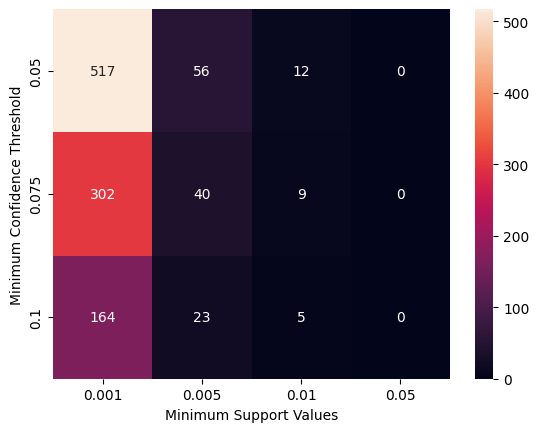

In [7]:
plot_heatmap(counts, msv_values, mct_values)

List the association rule(s) (i.e., one or more rules depending on dataset) that have the highest
confidence for minimum support = 0.005. What is that confidence value?

In [52]:
frequent_itemsets = get_frequent_itemsets(encoded_df, min_support=0.005)

#  using default min_confidence=0.1 from the cells above; this does not matter in this case however.
rules = get_association_rules(frequent_itemsets, min_confidence=0.1)

In [50]:
# sort the rules by confidence
sorted_rules = rules.sort_values(by='confidence', ascending=False)

In [51]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045625,0.160375,0.007500,0.164384,1.024995,0.000183,1.004797,0.025551
18,(sausage),(whole milk),0.061500,0.160375,0.010000,0.162602,1.013884,0.000137,1.002659,0.014591
5,(curd),(whole milk),0.033125,0.160375,0.005250,0.158491,0.988250,-0.000062,0.997761,-0.012148
8,(newspapers),(whole milk),0.038250,0.160375,0.006000,0.156863,0.978100,-0.000134,0.995834,-0.022751
6,(domestic eggs),(whole milk),0.039125,0.160375,0.006000,0.153355,0.956225,-0.000275,0.991708,-0.045476
7,(frankfurter),(whole milk),0.036750,0.160375,0.005250,0.142857,0.890769,-0.000644,0.979563,-0.112927
12,(pip fruit),(whole milk),0.047250,0.160375,0.006500,0.137566,0.857778,-0.001078,0.973553,-0.148230
22,(yogurt),(whole milk),0.079250,0.160375,0.010875,0.137224,0.855644,-0.001835,0.973167,-0.154856
19,(shopping bags),(whole milk),0.049250,0.160375,0.006750,0.137056,0.854596,-0.001148,0.972977,-0.151793
13,(pork),(whole milk),0.037500,0.160375,0.005125,0.136667,0.852169,-0.000889,0.972539,-0.152711


In [47]:
# display the rule(s) with the highest confidence
highest_confidence_rules = sorted_rules[sorted_rules['confidence'] == sorted_rules['confidence'].max()]

In [48]:
highest_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045625,0.160375,0.0075,0.164384,1.024995,0.000183,1.004797,0.025551


**OBSERVATION:** For support, $s >= 0.005$, the rule with the highest confidence has value: $c = 0.164384$.

## 2. Image Classification using CNN

Construct a 4-class classification model employing a Convolutional Neural Network (CNN) with the following simplistic architecture:

- A single convolutional layer featuring 8 filters of size 3 × 3.
- A max pooling layer with a pool size of 2 × 2.
- Flatten the tensor to prepare it for the fully connected layers.
- A hidden layer comprising 16 nodes.
- An output layer with 4 nodes (corresponding to the 4 classes) employing a `softmax` activation function for multi-class classification.

Utilize the `ReLU` (Rectified Linear Unit) activation function for all layers except the output layer. Train the model for 20 or more epochs using the `adam` optimizer and the `categorical cross-entropy` loss function. Allocate 20% of the data for validation during training to evaluate the model's performance. Select a batch size that ensures a balanced trade-off between computational efficiency and the training speed. For further guidance, refer to this [Keras Example](https://keras.io/examples/vision/mnist_convnet/).

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [15]:
DOG_IMAGES_PATH = "../assignment1/dataset/Cropped/"

### Define Functions
The functions below provide modularity and reusability.

In [16]:
def get_files(dog_class, img_path=DOG_IMAGES_PATH):
    """This function was implemented in assignment 1."""
    dir_path = os.path.join(img_path, dog_class)
    if os.path.exists(dir_path):
        files = [os.path.join(dir_path, file) for file in os.listdir(dir_path)]
        return files
    else:
        print(f"Directory {dir_path} does not exist.")
        return []

In [17]:
def load_images(file_paths):
    """Given image paths, load and vertically stack them using keras."""
    loaded_images = [image.img_to_array(image.load_img(file_path)) for file_path in file_paths]
    return np.stack(loaded_images)

In [18]:
def prepare_data():
    """
    This function prepares the image and label data for training. It was implemented in previous HWs.
    - Labels are generated based on the class index.
    - Images and labels are collected in lists which are then converted to NumPy arrays.
    - Labels are also one-hot encoded.
    
    Returns:
    - images (np.array): A NumPy array of loaded images.
    - labels_one_hot (np.array): A NumPy array of one-hot encoded labels corresponding to the images.
    """
    
    dog_classes = os.listdir(DOG_IMAGES_PATH)
    mapping = {f"class{i+1}": name for i, name in enumerate(dog_classes)}
    images, labels = [], []
    for i, class_name in enumerate(['class1', 'class2', 'class3', 'class4']):
        class_images_paths = get_files(mapping[class_name])
        class_images = load_images(class_images_paths)
        class_labels = [i] * len(class_images)
        images.extend(class_images)
        labels.extend(class_labels)
    return np.array(images), to_categorical(np.array(labels))

In [19]:
def build_model(kernel_size, input_shape):
    """
    Builds a CNN model with a specified kernel size.
    
    Parameters:
    - kernel_size (tuple): The dimensions of the convolutional kernel (e.g., (3, 3), (5, 5), etc.).
    - input_shape (tuple): The dimensions of the input image (e.g., (28, 28, 3))
    
    Returns:
    - model (tf.keras.models.Sequential): The constructed CNN model.
    
    The model architecture:
    - Convolutional layer with 8 filters of the specified kernel size, and ReLU activation.
    - MaxPooling layer with a 2x2 pool size.
    - Flatten layer to convert the feature maps to a 1D tensor.
    - Fully connected layer with 16 nodes and ReLU activation.
    - Output layer with 4 nodes (for 4 classes) and softmax activation for multi-class classification.
    """
    return models.Sequential([
        layers.Conv2D(8, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

In [20]:
def train_model(model, x_train, y_train, batch_size, epochs, validation_split):
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, 
                        epochs=epochs, validation_split=validation_split,
                        verbose=0)
    
    return model, history

In [21]:
def plot_learning_curves(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Data Preparation
Prepare data for the CNN.

In [22]:
# load dataset
images, labels_one_hot = prepare_data()

In [23]:
labels_one_hot[0], labels_one_hot[200], labels_one_hot[450], labels_one_hot[650]

(array([1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32))

In [24]:
# convert one-hot encoding back to class labels if needed
labels = np.argmax(labels_one_hot, axis=1)

In [25]:
labels[0], labels[200], labels[450], labels[650]

(0, 1, 2, 3)

In [26]:
# split the data into training and test datasets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)  # 20% for testing

# # for a validation set, split the train_images further
# train_images, val_images, train_labels, val_labels = train_test_split(
#     train_images, train_labels, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 20% of the original set for validation

In [27]:
# scale images to [0, 1] range
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [28]:
print(f"train_images shape: {train_images.shape}")
print(f"{train_images.shape[0]} train samples")
print(f"{test_images.shape[0]} test samples")

train_images shape: (557, 100, 100, 3)
557 train samples
140 test samples


In [29]:
# convert class labels back to one-hot encoding for training
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

### Build and Train Model

In [30]:
kernel3 = (3, 3)
input_shape = (images.shape[1], images.shape[2], images.shape[3])
print(input_shape)

(100, 100, 3)


In [31]:
model = build_model(kernel3, input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 19208)             0         
                                                                 
 dense (Dense)               (None, 16)                307344    
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 307636 (1.17 MB)
Trainable params: 307636 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [32]:
BATCH_SIZE = 64
EPOCHS = 30
VALIDATION_SPLIT = 0.2

In [33]:
model3, history3 = train_model(model,train_images, train_labels_one_hot, 
                               batch_size=BATCH_SIZE, epochs=EPOCHS, 
                               validation_split=VALIDATION_SPLIT)

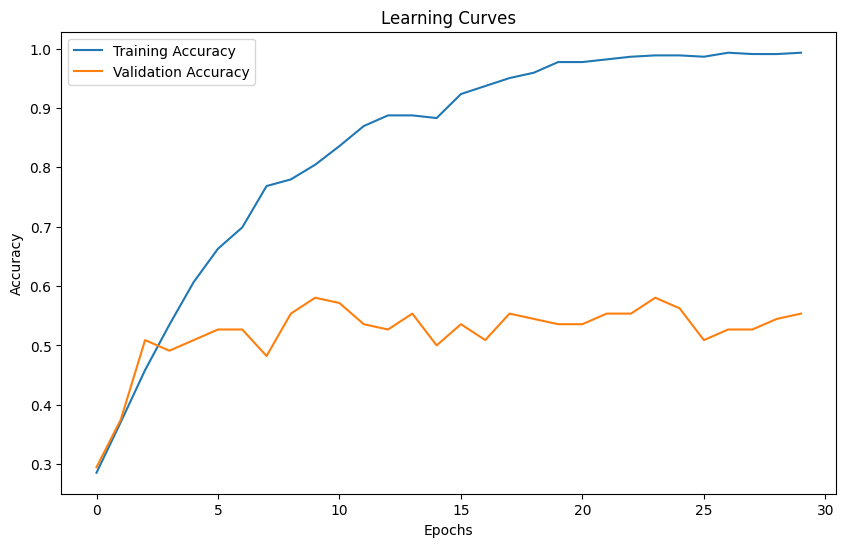

In [34]:
plot_learning_curves(history3)

In [35]:
score = model3.evaluate(test_images, test_labels_one_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0838483572006226
Test accuracy: 0.6214285492897034


Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all
other parameters unchanged

In [36]:
kernel5 = (5, 5)
model = build_model(kernel5, input_shape)

In [37]:
model5, history5 = train_model(model, train_images, train_labels_one_hot, 
                               batch_size=BATCH_SIZE, epochs=EPOCHS, 
                               validation_split=VALIDATION_SPLIT)

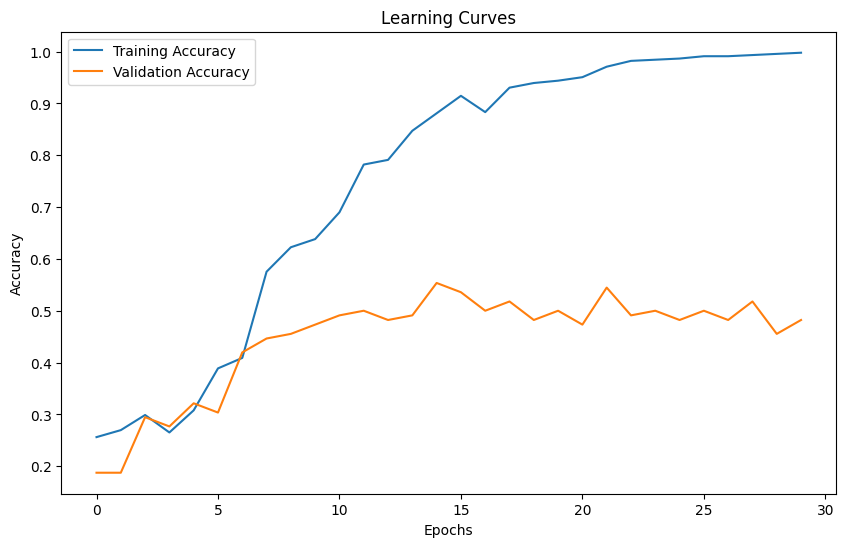

In [40]:
plot_learning_curves(history5)

In [41]:
score = model5.evaluate(test_images, test_labels_one_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1769672632217407
Test accuracy: 0.6071428656578064


In [40]:
kernel7 = (7, 7)
model = build_model(kernel7, input_shape)

In [41]:
model7, history7 = train_model(model, train_images, train_labels_one_hot, 
                               batch_size=BATCH_SIZE, epochs=EPOCHS, 
                               validation_split=VALIDATION_SPLIT)

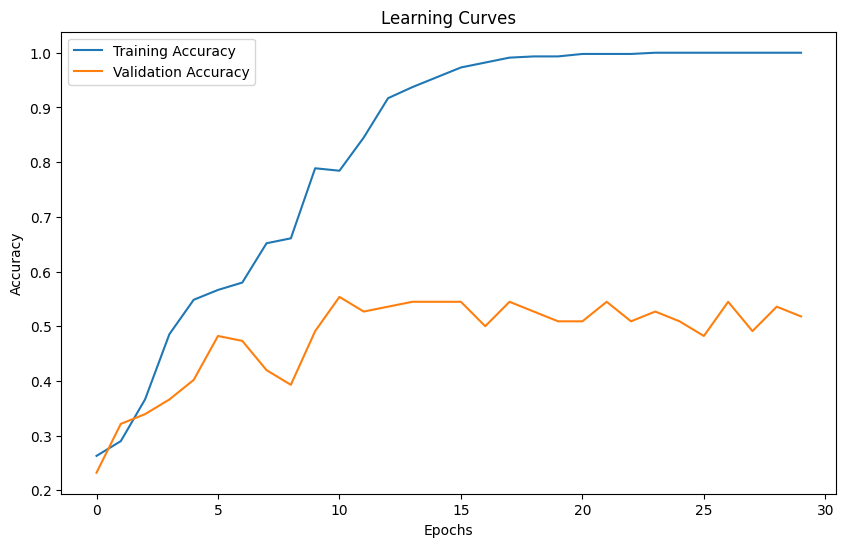

In [42]:
plot_learning_curves(history7)

In [43]:
score = model7.evaluate(test_images, test_labels_one_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.4322681427001953
Test accuracy: 0.5714285969734192


**OBSERVATIONS:** 
Each model's training accuracy reaches $1$ over the 30 epochs. However, the test accuracy for each model is:
- (a) The original model (kernel size $3 \times 3$) had test accuracy $= 0.6214$.
- (b) The model with kernel size $5 \times 5$ had test accuracy $= 0.6071$.
- (c) The model with kernel size $7 \times 7$ had test accuracy $= 0.5714$.

This shows that the models perform extremely well on the training data, but poorly on the test data - which is a sign of overfitting to the training data. However, model (a) with the kernel size $3 \times 3$ shows less overfitting and higher test accuracy in comparison to the other two models and is just the right architecture.

The CNN implementation almost doubles the test accuracy from the previous implementations using KNN, NN, and RandomForest which were roughly around 30-40% on the test data.